In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
event_k = pd.read_csv('event_k_numbers.csv')

In [3]:
event_k.head(3)

,event_type,date_of_event,device_date_of_manufacturer,product_code,days_from_release_to_failure,year_of_manufacture,year_of_event,pma_pmn_number,product_problems,mdr_text_1,manufacturer_narrative,brand,manufacturer_name,generic_name,mdr_report_key,k_number
0,Malfunction,2011-04-27,2009-05-01,GEX,726,2009,2011,K062719,[Detachment Of Device Component],IT WAS REPORTED BY A CUSTOMER ON (B)(6) 2011 T...,No text,GREENLIGHT ADDSTAT,"AMS, INNOVATION CENTER - SILICON VALLEY",SURGICAL FIBER,2107747,K062719
1,Malfunction,2011-04-28,2010-11-29,FGE,150,2010,2011,K083627,"[Activation, Positioning or SeparationProblem]",IT WAS REPORTED TO BOSTON SCIENTIFIC CORPORATI...,A VISUAL EXAMINATION OF THE RETURNED DEVICE FO...,WALLFLEX BILIARY RX FULLY-COVERED STENT SYSTEM...,BOSTON SCIENTIFIC - GALWAY,"CATHETER, BILIARY, DIAGNOSTIC",2099782,K083627
2,Malfunction,2011-05-18,2011-03-25,EOQ,54,2011,2011,K040018,[Retraction Problem],IT WAS REPORTED TO BOSTON SCIENTIFIC CORPORATI...,DEVICE (B)(6) RELATES TO (B)(6) FOR THE REPORT...,"EXCELON TRANSBRONCHIAL ASPIRATION NEEDLE, MODE...",BOSTON SCIENTIFIC - SPENCER,BRONCHOSCOPE (FLEXIBLE OR RIGID),2120459,K040018


In [4]:
event_k.isnull().sum()

event_type                         0
date_of_event                      0
device_date_of_manufacturer        0
product_code                       0
days_from_release_to_failure       0
year_of_manufacture                0
year_of_event                      0
pma_pmn_number                     0
product_problems                   0
mdr_text_1                       315
manufacturer_narrative            38
brand                            630
manufacturer_name                466
generic_name                    5436
mdr_report_key                     0
k_number                           0
dtype: int64

In [5]:
event_k.dropna(inplace=True)

In [6]:
event_k.isnull().sum()

event_type                      0
date_of_event                   0
device_date_of_manufacturer     0
product_code                    0
days_from_release_to_failure    0
year_of_manufacture             0
year_of_event                   0
pma_pmn_number                  0
product_problems                0
mdr_text_1                      0
manufacturer_narrative          0
brand                           0
manufacturer_name               0
generic_name                    0
mdr_report_key                  0
k_number                        0
dtype: int64

In [7]:
event_k.reset_index(inplace=True, drop=True)

In [8]:
event_k.to_csv('event_k_numbers.csv', index=False)

# K Number Analysis

### Plot the top 10 product codes with most entries

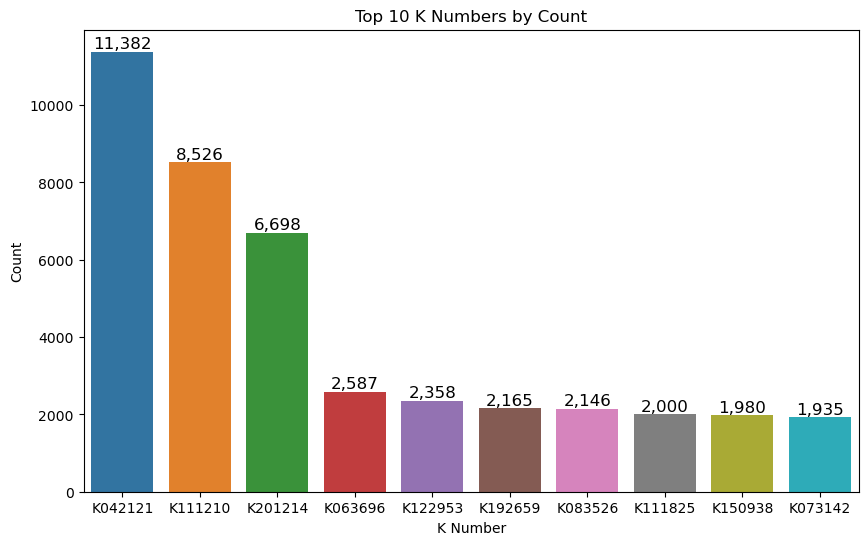

In [9]:
top_10_counts = event_k['k_number'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_counts.index, y=top_10_counts.values)
plt.xlabel('K Number')
plt.ylabel('Count')
plt.title('Top 10 K Numbers by Count')

# add values on top of the bars
for i, v in enumerate(top_10_counts.values):
    plt.text(i, v, format(v, ',d'), ha='center', va='bottom', fontsize=12)

plt.show()

### Verify failure by years

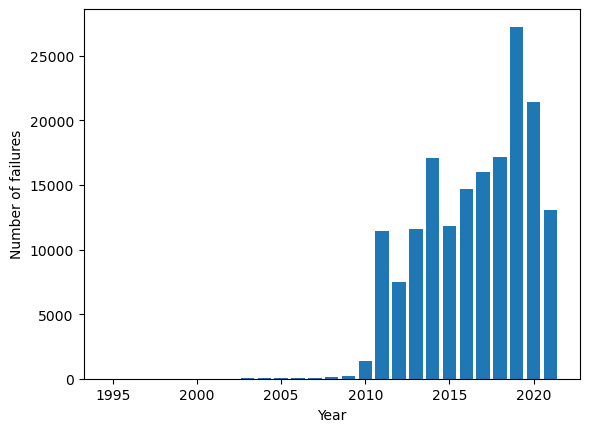

In [10]:
# Group the data by year and count the number of failures
failures_by_year = event_k.groupby('year_of_event').size()

# Create the bar chart
plt.bar(failures_by_year.index, failures_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of failures')
plt.show()

### Plot the concentration of device failures by the time period

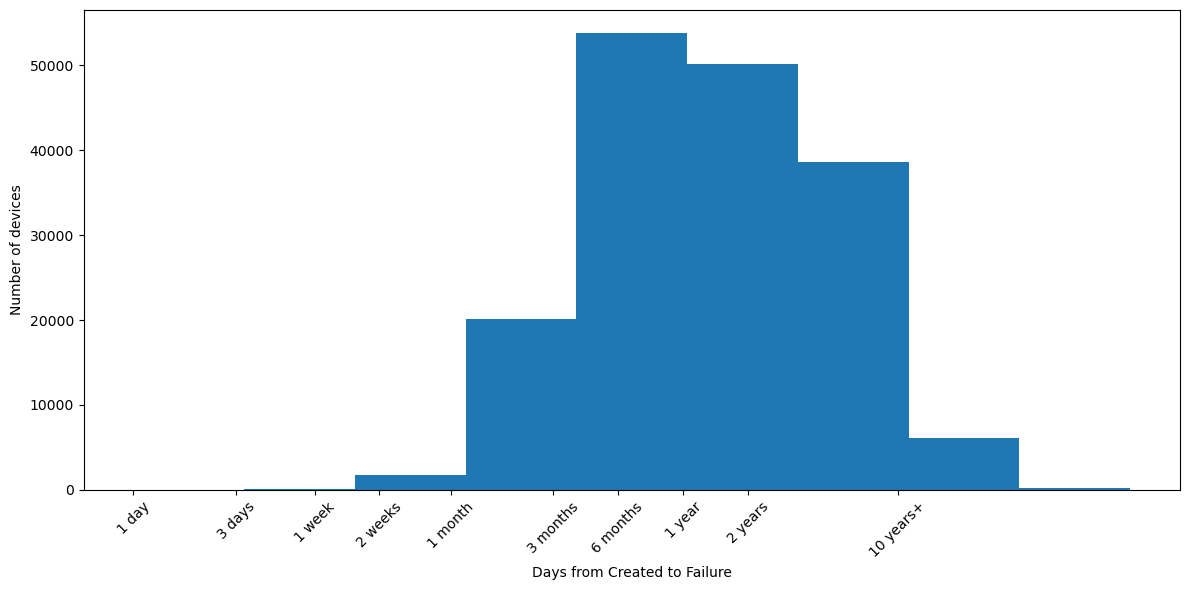

In [11]:
bins = np.logspace(0, np.log10(event_k['days_from_release_to_failure'].max()), num=10)

# plot a histogram of the days_from_created_to_broken variable with logarithmic binning
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(event_k['days_from_release_to_failure'], bins=bins)
ax.set_xscale('log')
ax.set_xlabel('Days from Created to Failure')
ax.set_ylabel('Number of devices')

# add custom tick labels on the x-axis
tick_values = [1, 3, 7, 14, 30, 90, 180, 365, 730, 3650]
tick_labels = ['1 day', '3 days', '1 week', '2 weeks', '1 month', '3 months', '6 months', '1 year', '2 years', '10 years+']
ax.set_xticks(tick_values)
ax.set_xticklabels(tick_labels, rotation=45)
ax.xaxis.set_tick_params(which='minor', bottom=False)

plt.tight_layout()
plt.show()

### Look a the distribution of K Numbers entries 

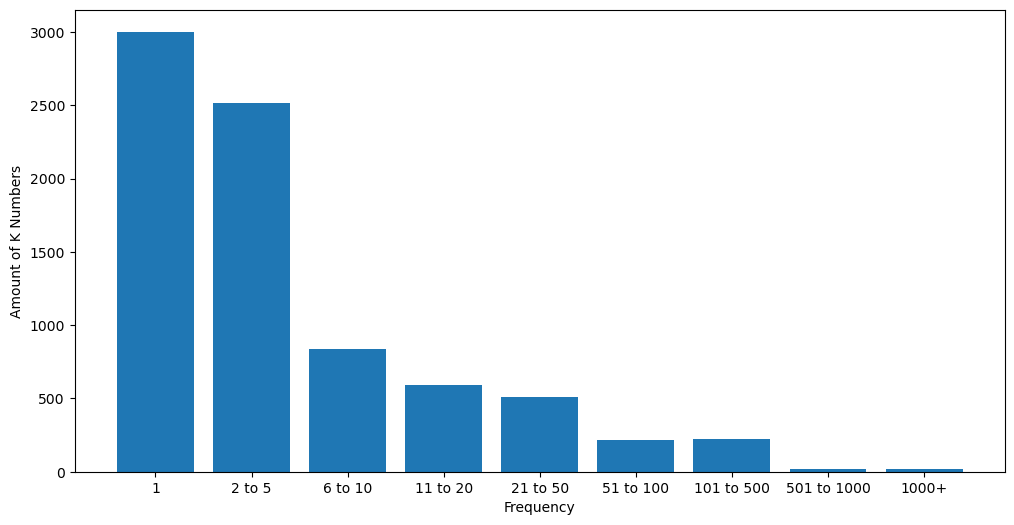

In [12]:
product_counts = event_k['k_number'].value_counts()

# Group the product counts into bins based on their value
bins = [0, 1, 5, 10, 20, 50, 100, 500, 1000, float('inf')]
labels = ['1', '2 to 5', '6 to 10', '11 to 20', '21 to 50', '51 to 100', '101 to 500', '501 to 1000', '1000+']
grouped_counts = product_counts.groupby(pd.cut(product_counts, bins=bins, labels=labels)).count()

# Create a bar chart of the grouped counts
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(grouped_counts.index, grouped_counts.values)
ax.set_xlabel('Frequency')
ax.set_ylabel('Amount of K Numbers')
plt.show()

In [13]:
total_count = len(product_counts)
grouped_counts = product_counts.groupby(pd.cut(product_counts, bins=bins, labels=labels)).count()
percentage_distribution = grouped_counts / total_count * 100

In [14]:
percentage_distribution

k_number
1              37.832388
2 to 5         31.732829
6 to 10        10.535602
11 to 20        7.485822
21 to 50        6.402016
51 to 100       2.696912
101 to 500      2.848141
501 to 1000     0.226843
1000+           0.239445
Name: k_number, dtype: float64

### Plot Devices with the shortest and longest time from release to failure

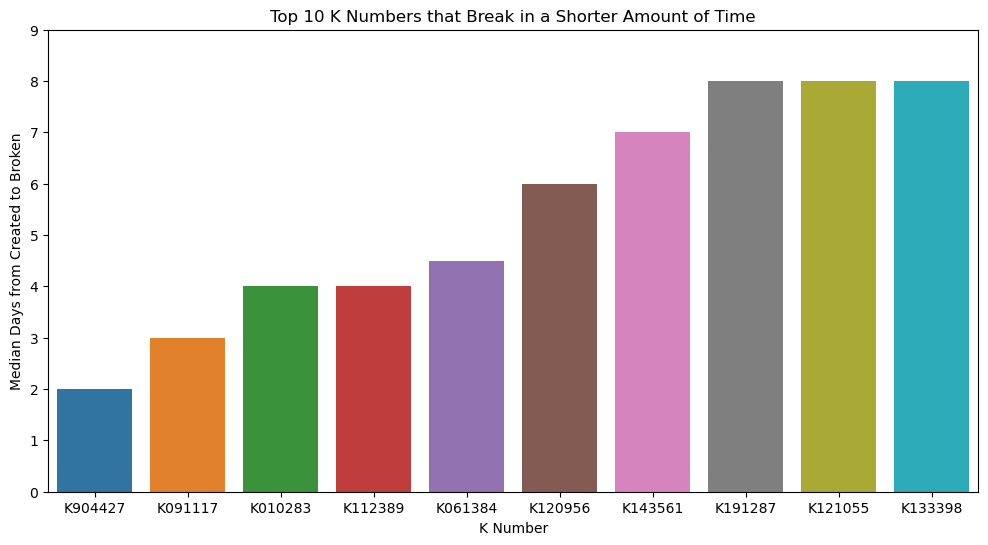

In [15]:
# group the dataset by product_code and calculate the median of days_from_created_to_broken
median_days = event_k.groupby('k_number')['days_from_release_to_failure'].median()

# sort the medians in ascending order
top_shorter = median_days.sort_values().head(10)

# plot a bar chart of the top 10 product codes with the shortest median values
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=top_shorter.index, y=top_shorter.values)
plt.xlabel('K Number')
plt.ylabel('Median Days from Created to Broken')
plt.title('Top 10 K Numbers that Break in a Shorter Amount of Time')
plt.yticks(top_shorter.values.astype(int))
plt.yticks(np.arange(0, 10, 1))
plt.show()

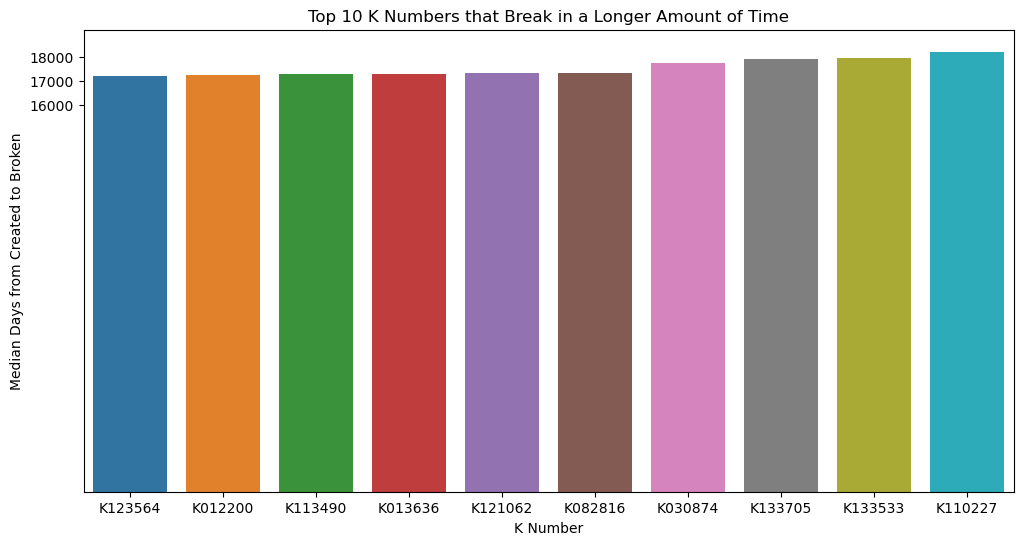

In [16]:
median_days = event_k.groupby('k_number')['days_from_release_to_failure'].median()

# sort the medians in ascending order
top_shorter = median_days.sort_values().tail(10)
# plot a bar chart of the top 10 product codes with the shortest median values
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=top_shorter.index, y=top_shorter.values)
plt.xlabel('K Number')
plt.ylabel('Median Days from Created to Broken')
plt.title('Top 10 K Numbers that Break in a Longer Amount of Time')
plt.yticks(top_shorter.values.astype(int))
plt.yticks(np.arange(16000, 19000, 1000))
plt.show()

### Check for seasonality within top 10 K Numbers

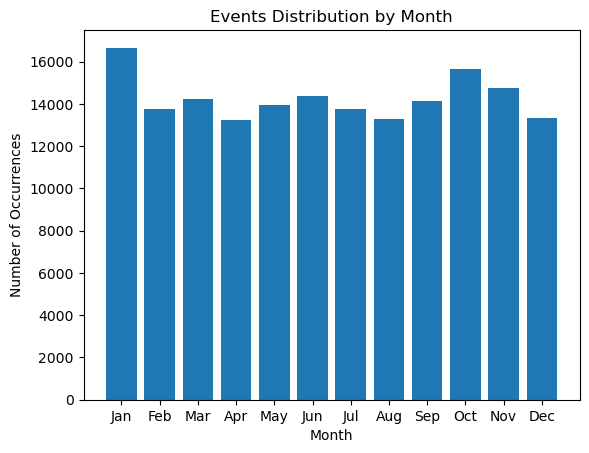

In [17]:
event_k["date_of_event"] = pd.to_datetime(event_k["date_of_event"])
df_monthly_counts = event_k.groupby(event_k["date_of_event"].dt.month).size().reset_index(name="counts")
df_monthly_counts["month"] = pd.to_datetime(df_monthly_counts["date_of_event"], format="%m").dt.month_name().str.slice(stop=3)
plt.bar(df_monthly_counts["month"], df_monthly_counts["counts"])
plt.xlabel("Month")
plt.ylabel("Number of Occurrences")
plt.title("Events Distribution by Month")
plt.show()

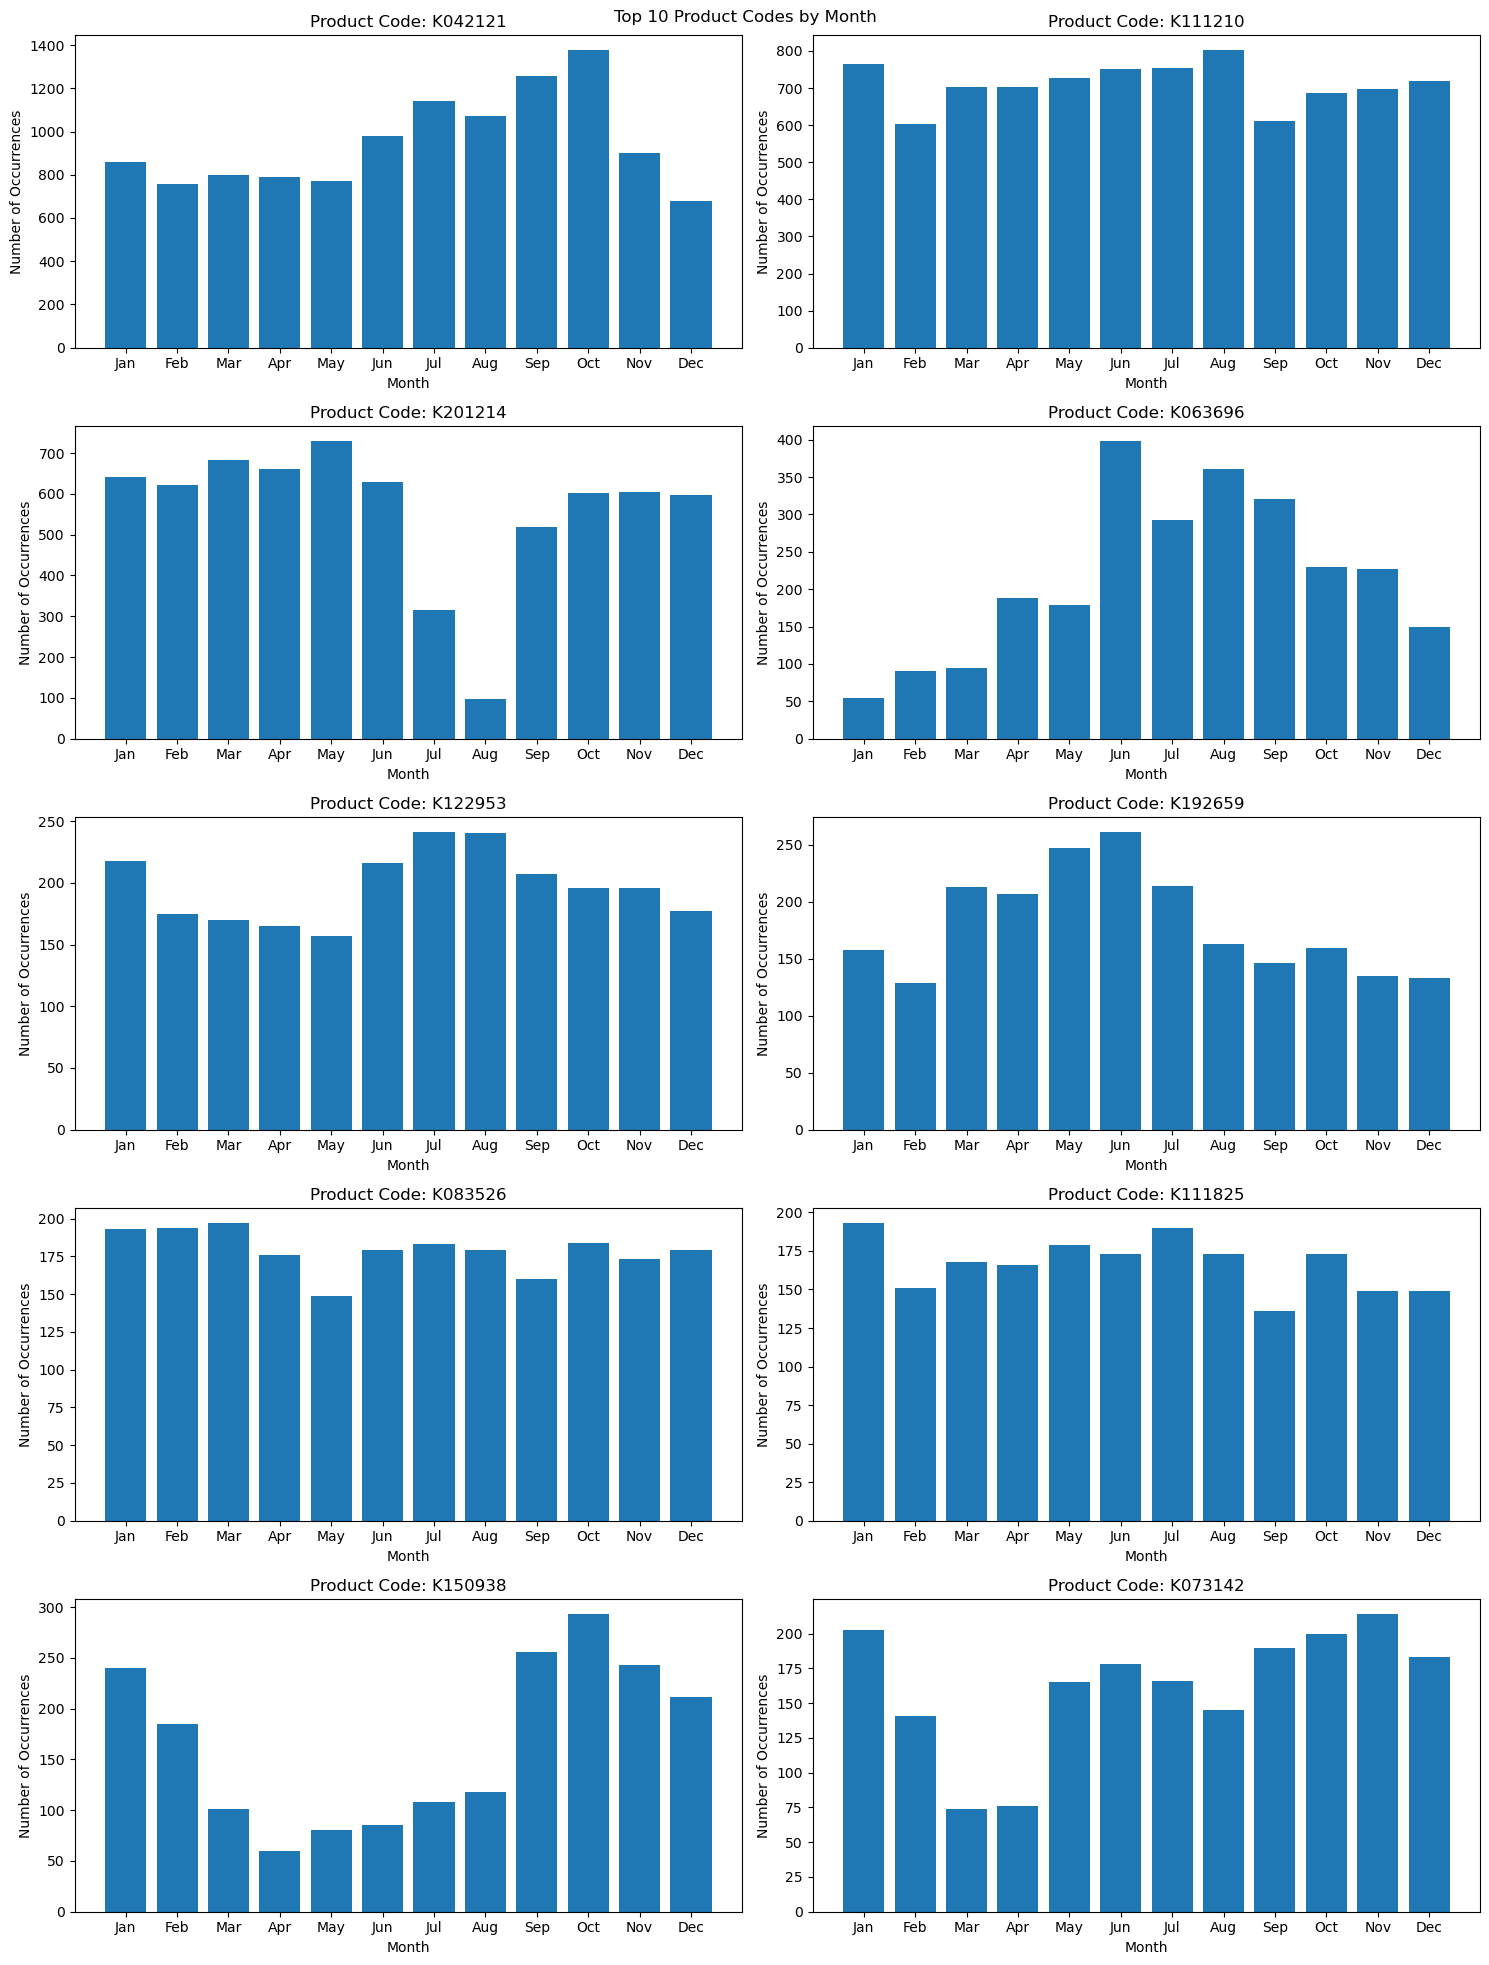

In [18]:
top_10_product_codes = event_k["k_number"].value_counts().nlargest(10).index.tolist()
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
for i, k_number in enumerate(top_10_product_codes):
    df_product_code = event_k[event_k["k_number"] == k_number]
    df_monthly_counts = df_product_code.groupby(df_product_code["date_of_event"].dt.month).size().reset_index(name="counts")
    df_monthly_counts["month"] = pd.to_datetime(df_monthly_counts["date_of_event"], format="%m").dt.month_name().str.slice(stop=3)
    ax = axs[i // 2, i % 2]
    ax.bar(df_monthly_counts["month"], df_monthly_counts["counts"])
    ax.set_title(f"Product Code: {k_number}")
    ax.set_xlabel("Month")
    ax.set_ylabel("Number of Occurrences")
plt.suptitle("Top 10 Product Codes by Month")
plt.tight_layout()
plt.show()

### Write code to take the months per product code (see min and max) calculate the discrepancy and return the product codes that would have 

In [19]:
import pandas as pd

def find_product_month_distribution(df, threshold):
    # Get a list of unique product codes
    product_codes = df['k_number'].unique()
    
    # Create an empty list to store the product codes that meet the threshold
    results = []
    
    for code in product_codes:
        # Get the subset of the dataframe for the current product code
        code_df = df[df['k_number'] == code]
        
        # Calculate the count of events for each month
        counts = code_df.groupby(code_df['date_of_event'].dt.month)['date_of_event'].count()
        
        # Find the month with the most events and the minimum number of events
        max_month = counts.idxmax()
        min_month = counts.idxmin()
        
        # Calculate the percentage difference between the max and min months
        diff = (counts[max_month] - counts[min_month]) / counts[min_month] * 100
        
        # If the percentage difference is greater than the threshold, add the product code to the results list
        if diff > threshold:
            results.append(code)
    
    return results

In [20]:
result = find_product_month_distribution(event_k, 40)

In [21]:
len(result)

2947

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


def analyze_product_distribution(df, threshold, n_top):
    # Group by product code and count the number of occurrences for each month
    gb = df.groupby(['k_number', df['date_of_event'].dt.month])['date_of_event'].count()

    # Calculate the percentage change between the month with the most and least occurrences
    percentage_changes = {}
    for product, counts in gb.groupby('k_number'):
        min_count = counts.min()
        max_count = counts.max()
        percentage_change = (max_count - min_count) / min_count
        percentage_changes[product] = percentage_change

    # Select the products with the highest percentage change
    top_products = sorted(percentage_changes.items(), key=lambda x: x[1], reverse=True)[:n_top]

    # Plot the distribution of each top product code
    
    fig, axs = plt.subplots(n_top, 1, figsize=(10, 20))
    for i, (product, percentage_change) in enumerate(top_products):
        counts = gb.loc[product]
        axs[i].bar(counts.index, counts.values)
        axs[i].set_title(f"K Number: {product}")

    # Return the top products that have a percentage change greater than the threshold
    top_products_filtered = [(product, percentage_change) for product, percentage_change in percentage_changes.items()
                             if percentage_change > threshold]
    return top_products_filtered


[('K010924', 138.0),
 ('K042172', 22.0),
 ('K050228', 823.0),
 ('K070398', 42.25),
 ('K081495', 43.0),
 ('K090096', 65.0),
 ('K133532', 145.0),
 ('K133604', 58.0),
 ('K133801', 26.0),
 ('K180045', 28.0),
 ('K193371', 28.666666666666668),
 ('K971544', 21.0),
 ('K982836', 39.0),
 ('K983070', 39.0)]

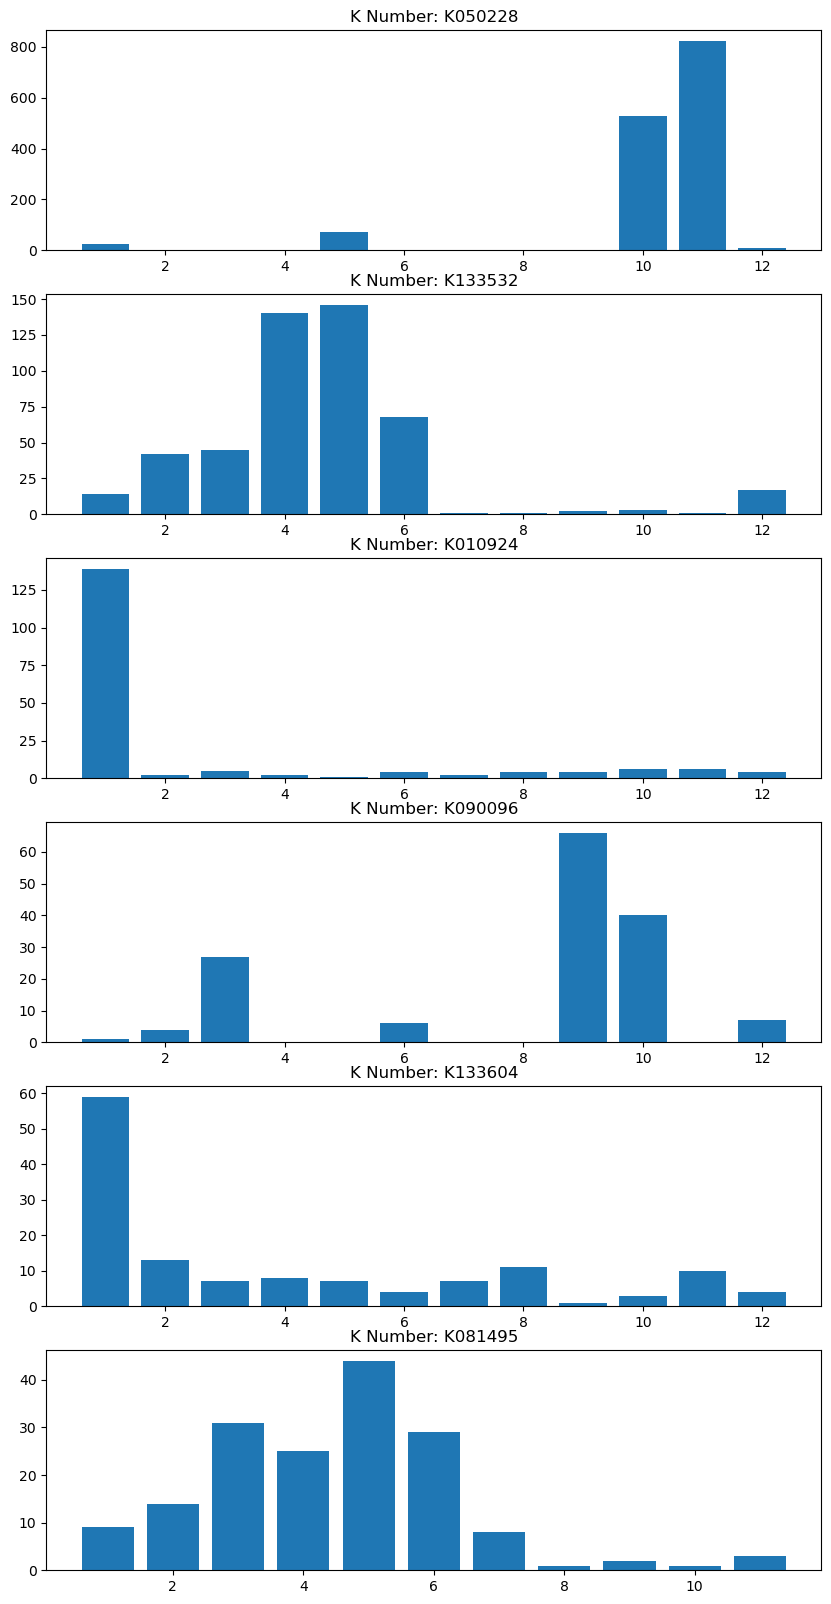

In [23]:
analyze_product_distribution(event_k, 20, 6)

In [24]:
# MAKE A DATASET WITH A DICTIONARY FOR THE MONTHS, A MIN AND MAX COLUMN WITH A DICTIONARY ALSO

In [25]:
event_k.reset_index(inplace=True, drop=True)

In [26]:
event_k.query('k_number == "K062719"')

,event_type,date_of_event,device_date_of_manufacturer,product_code,days_from_release_to_failure,year_of_manufacture,year_of_event,pma_pmn_number,product_problems,mdr_text_1,manufacturer_narrative,brand,manufacturer_name,generic_name,mdr_report_key,k_number
0,Malfunction,2011-04-27,2009-05-01,GEX,726,2009,2011,K062719,[Detachment Of Device Component],IT WAS REPORTED BY A CUSTOMER ON (B)(6) 2011 T...,No text,GREENLIGHT ADDSTAT,"AMS, INNOVATION CENTER - SILICON VALLEY",SURGICAL FIBER,2107747,K062719
23,Malfunction,2011-05-12,2010-10-01,GEX,223,2010,2011,K062719,[Detachment Of Device Component],IT WAS REPORTED BY A CUSTOMER ON (B)(6) 2011 T...,No text,GREENLIGHT ADDSTAT,"AMS, INNOVATION CENTER-SILICON VALLEY",SURGICAL FIBER,2175987,K062719
30,Malfunction,2011-02-16,2010-07-01,GEX,230,2010,2011,K062719,[Break],"IT WAS REPORTED BY A CUSTOMER ON (B)(6) 2011, ...",No text,GREENLIGHT ADDSTAT,"AMERICAN MEDICAL SYSTEMS, INNOVATION CENTER - ...",SURGICAL FIBER,2096383,K062719
86,Malfunction,2010-08-09,2010-02-01,GEX,189,2010,2010,K062719,"[Naturally Worn, Output below Specifications]","IT WAS REPORTED BY A CUSTOMER ON (B)(6) 2010, ...",THE EVENT DESCRIPTION THE CUSTOMER REPORTED TO...,GREENLIGHT ADDSTAT,"AMS, INNOVATION CENTER - SILICON VALLEY",SURGICAL FIBER,2079618,K062719
99,Malfunction,2011-03-30,2010-08-01,GEX,241,2010,2011,K062719,"[Break, Failure to Align]","IT WAS REPORTED BY A CUSTOMER ON (B)(6) 2011, ...",No text,GREENLIGHT ADDSTAT,"AMERICAN MEDICAL SYSTEMS, INNOVATION CENTER - ...",SURGICAL FIBER,2081081,K062719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166575,Malfunction,2009-12-12,2009-02-01,GEX,314,2009,2009,K062719,[Thermal Decomposition of Device],"IT WAS REPORTED BY A CUSTOMER ON (B)(6) 2009, ...",No text,GREENLIGHT ADDSTAT,"AMERICAN MEDICAL SYSTEMS, INNOVATION CENTER - ...",SURGICAL FIBER,2189373,K062719
167722,Malfunction,2011-09-15,2010-06-01,GEX,471,2010,2011,K062719,"[Device Alarm System, Sparking]",IT WAS REPORTED BY A CUSTOMER THAT ON (B)(6) 2...,No text,GREENLIGHT ADDSTAT,"AMERICAN MEDICAL SYSTEMS, INC.",SURGICAL FIBER,2321945,K062719
170036,Injury,2012-06-12,2008-03-01,GEX,1564,2008,2012,K062719,[Device Displays Incorrect Message],IT WAS REPORTED THAT THE CUSTOMER EXPERIENCED ...,THE LASER HAS BEEN SERVICED IN THE FIELD. THE ...,GREENLIGHT SURGICAL LASER SYSTEM,"AMERICAN MEDICAL SYSTEMS, INC.",LASER SYSTEM,2657297,K062719
170040,Malfunction,2011-08-22,2011-02-01,GEX,202,2011,2011,K062719,[Device Displays Incorrect Message],CUSTOMER REPORTED A FIBER CONNECTION ERROR REC...,THE DEVICE WAS RETURNED TO THE MFR AND ANALYZE...,"ANGLED DELIVERY DEVICE, GREENLIGHT",AMERICAN MEDICAL SYSTEMS,SURGICAL FIBER,2668234,K062719


In [27]:
len(event_k.product_problems.unique())

9443

In [28]:
gb = event_k.query('k_number == "K062719"')

In [29]:
gb

,event_type,date_of_event,device_date_of_manufacturer,product_code,days_from_release_to_failure,year_of_manufacture,year_of_event,pma_pmn_number,product_problems,mdr_text_1,manufacturer_narrative,brand,manufacturer_name,generic_name,mdr_report_key,k_number
0,Malfunction,2011-04-27,2009-05-01,GEX,726,2009,2011,K062719,[Detachment Of Device Component],IT WAS REPORTED BY A CUSTOMER ON (B)(6) 2011 T...,No text,GREENLIGHT ADDSTAT,"AMS, INNOVATION CENTER - SILICON VALLEY",SURGICAL FIBER,2107747,K062719
23,Malfunction,2011-05-12,2010-10-01,GEX,223,2010,2011,K062719,[Detachment Of Device Component],IT WAS REPORTED BY A CUSTOMER ON (B)(6) 2011 T...,No text,GREENLIGHT ADDSTAT,"AMS, INNOVATION CENTER-SILICON VALLEY",SURGICAL FIBER,2175987,K062719
30,Malfunction,2011-02-16,2010-07-01,GEX,230,2010,2011,K062719,[Break],"IT WAS REPORTED BY A CUSTOMER ON (B)(6) 2011, ...",No text,GREENLIGHT ADDSTAT,"AMERICAN MEDICAL SYSTEMS, INNOVATION CENTER - ...",SURGICAL FIBER,2096383,K062719
86,Malfunction,2010-08-09,2010-02-01,GEX,189,2010,2010,K062719,"[Naturally Worn, Output below Specifications]","IT WAS REPORTED BY A CUSTOMER ON (B)(6) 2010, ...",THE EVENT DESCRIPTION THE CUSTOMER REPORTED TO...,GREENLIGHT ADDSTAT,"AMS, INNOVATION CENTER - SILICON VALLEY",SURGICAL FIBER,2079618,K062719
99,Malfunction,2011-03-30,2010-08-01,GEX,241,2010,2011,K062719,"[Break, Failure to Align]","IT WAS REPORTED BY A CUSTOMER ON (B)(6) 2011, ...",No text,GREENLIGHT ADDSTAT,"AMERICAN MEDICAL SYSTEMS, INNOVATION CENTER - ...",SURGICAL FIBER,2081081,K062719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166575,Malfunction,2009-12-12,2009-02-01,GEX,314,2009,2009,K062719,[Thermal Decomposition of Device],"IT WAS REPORTED BY A CUSTOMER ON (B)(6) 2009, ...",No text,GREENLIGHT ADDSTAT,"AMERICAN MEDICAL SYSTEMS, INNOVATION CENTER - ...",SURGICAL FIBER,2189373,K062719
167722,Malfunction,2011-09-15,2010-06-01,GEX,471,2010,2011,K062719,"[Device Alarm System, Sparking]",IT WAS REPORTED BY A CUSTOMER THAT ON (B)(6) 2...,No text,GREENLIGHT ADDSTAT,"AMERICAN MEDICAL SYSTEMS, INC.",SURGICAL FIBER,2321945,K062719
170036,Injury,2012-06-12,2008-03-01,GEX,1564,2008,2012,K062719,[Device Displays Incorrect Message],IT WAS REPORTED THAT THE CUSTOMER EXPERIENCED ...,THE LASER HAS BEEN SERVICED IN THE FIELD. THE ...,GREENLIGHT SURGICAL LASER SYSTEM,"AMERICAN MEDICAL SYSTEMS, INC.",LASER SYSTEM,2657297,K062719
170040,Malfunction,2011-08-22,2011-02-01,GEX,202,2011,2011,K062719,[Device Displays Incorrect Message],CUSTOMER REPORTED A FIBER CONNECTION ERROR REC...,THE DEVICE WAS RETURNED TO THE MFR AND ANALYZE...,"ANGLED DELIVERY DEVICE, GREENLIGHT",AMERICAN MEDICAL SYSTEMS,SURGICAL FIBER,2668234,K062719


In [42]:
type(gb['mdr_report_key'][0])

numpy.int64

In [30]:
gbc = gb.groupby([gb['date_of_event'].dt.month])['date_of_event'].count()
gbc

date_of_event
1     29
2     25
3     21
4     26
5     18
6     29
7     12
8     22
9     21
10    17
11    20
12    33
Name: date_of_event, dtype: int64

In [31]:
print(gbc.min())
print(gbc.max())

12
33


<AxesSubplot:xlabel='date_of_event'>

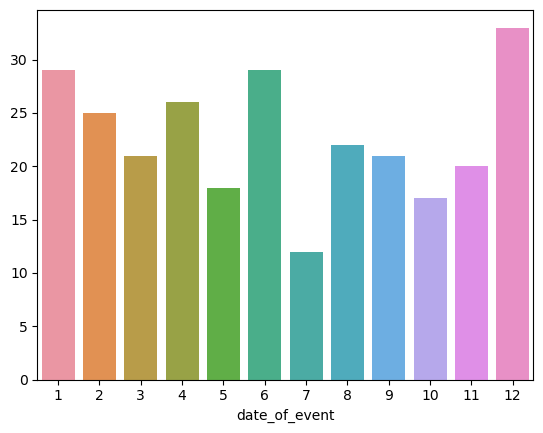

In [32]:
sns.barplot(x=gbc.index, y=gbc.values)

In [33]:
gb.product_problems.unique()

array(['[Detachment Of Device Component]', '[Break]',
       '[Naturally Worn, Output below Specifications]',
       '[Break, Failure to Align]',
       '[Thermal Decomposition of Device, Charred]',
       '[Appropriate Term/Code Not Available]',
       '[Material Integrity Problem]', '[Misfire]',
       '[Output below Specifications]', '[Melted]',
       '[Device Operates Differently Than Expected, Flare or Flash]',
       '[Device Operates Differently Than Expected]',
       '[Device Displays Incorrect Message]',
       '[Device Alarm System, No Device Output]',
       '[Device Alarm System, Detachment Of Device Component]', '[Crack]',
       '[Improper Device Output]', '[Fracture]',
       '[Thermal Decomposition of Device]', '[Output Problem]',
       '[Break, Appropriate Term/Code Not Available]',
       '[Detachment of Device or Device Component]',
       '[Device Inoperable]',
       '[Device Alarm System, Failure to Align, Sparking]',
       '[Failure to Align]', '[Flare or Fla

In [34]:
gbp = gb.groupby([gb['product_problems']])['product_problems'].count()
gbp
    

product_problems
[Adverse Event Without Identified Device or Use Problem]                     1
[Appropriate Term/Code Not Available]                                       27
[Break, Appropriate Term/Code Not Available]                                 2
[Break, Crack]                                                               1
[Break, Detachment Of Device Component]                                      2
                                                                            ..
[Thermal Decomposition of Device, Melted, Improper Device Output]            4
[Thermal Decomposition of Device, Melted, Loss of Power, Flare or Flash]     1
[Thermal Decomposition of Device, Melted, Output below Specifications]       2
[Thermal Decomposition of Device, Melted]                                    2
[Thermal Decomposition of Device]                                            8
Name: product_problems, Length: 67, dtype: int64

In [35]:
terms = list(gb['product_problems'])

In [36]:
terms_dict = {}

In [37]:
for i in terms:
    i = i.replace('[', '')
    i = i.replace(']', '')
    if ',' in i:
        lst = i.split(',')
        for j in lst:
            if j not in terms_dict:
                terms_dict[j] = 1
            else:
                terms_dict[j] += 1
    else:
        if i not in terms_dict:
            terms_dict[i] = 1
        else:
            terms_dict[i] += 1
            
terms_dict       

{'Detachment Of Device Component': 18,
 'Break': 65,
 'Naturally Worn': 1,
 ' Output below Specifications': 5,
 ' Failure to Align': 12,
 'Thermal Decomposition of Device': 22,
 ' Charred': 1,
 'Appropriate Term/Code Not Available': 27,
 'Material Integrity Problem': 3,
 'Misfire': 19,
 'Output below Specifications': 7,
 'Melted': 1,
 'Device Operates Differently Than Expected': 8,
 ' Flare or Flash': 3,
 'Device Displays Incorrect Message': 8,
 'Device Alarm System': 8,
 ' No Device Output': 2,
 ' Detachment Of Device Component': 4,
 'Crack': 2,
 'Improper Device Output': 18,
 'Fracture': 3,
 'Output Problem': 10,
 ' Appropriate Term/Code Not Available': 2,
 'Detachment of Device or Device Component': 4,
 'Device Inoperable': 3,
 ' Sparking': 2,
 'Failure to Align': 28,
 'Flare or Flash': 2,
 ' Break': 1,
 'Material Perforation': 6,
 ' Temperature Problem': 4,
 ' Improper Device Output': 8,
 'Material Twisted/Bent': 1,
 ' Device Operates Differently Than Expected': 1,
 ' Melted': 10,


In [38]:
res = dict(sorted(terms_dict.items(), key = lambda x: x[1], reverse = True)[:5])

In [39]:
res

{'Break': 65,
 'Failure to Align': 28,
 'Appropriate Term/Code Not Available': 27,
 'Thermal Decomposition of Device': 22,
 'Misfire': 19}

In [40]:
res2 = []

for i in res:
    top = i+': '+str(res[i])
    res2.append(top)

In [41]:
res2

['Break: 65',
 'Failure to Align: 28',
 'Appropriate Term/Code Not Available: 27',
 'Thermal Decomposition of Device: 22',
 'Misfire: 19']

In [43]:
gb.mdr_report_key

0         2107747
23        2175987
30        2096383
86        2079618
99        2081081
           ...   
166575    2189373
167722    2321945
170036    2657297
170040    2668234
170627    2553750
Name: mdr_report_key, Length: 273, dtype: int64

In [46]:
queried_key = gb.query('mdr_report_key == 2175987')

In [47]:
queried_key

,event_type,date_of_event,device_date_of_manufacturer,product_code,days_from_release_to_failure,year_of_manufacture,year_of_event,pma_pmn_number,product_problems,mdr_text_1,manufacturer_narrative,brand,manufacturer_name,generic_name,mdr_report_key,k_number
23,Malfunction,2011-05-12,2010-10-01,GEX,223,2010,2011,K062719,[Detachment Of Device Component],IT WAS REPORTED BY A CUSTOMER ON (B)(6) 2011 T...,No text,GREENLIGHT ADDSTAT,"AMS, INNOVATION CENTER-SILICON VALLEY",SURGICAL FIBER,2175987,K062719
